Davies-Bouldin Index: 0.804897529469451


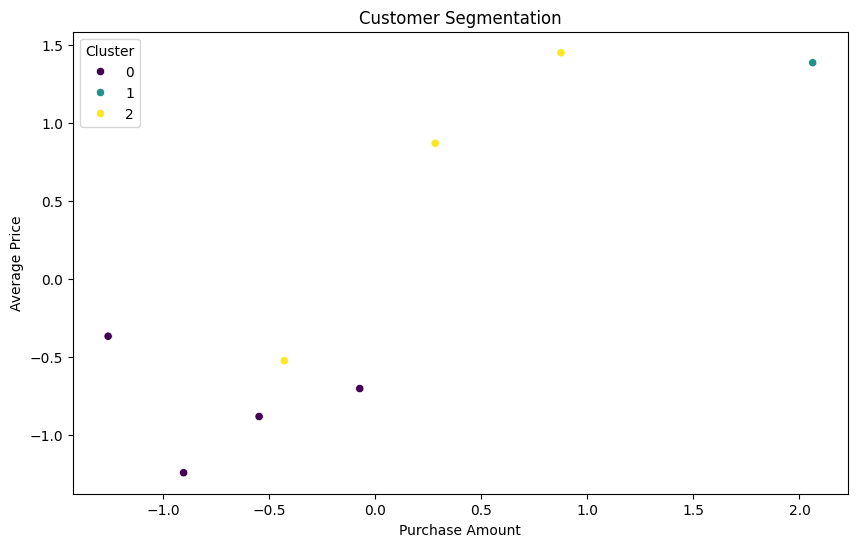

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load customer data
customers = pd.read_csv('/workspaces/eCommerce-Transaction-Dataset/Customers.csv')

# Load product data
products = pd.read_csv('/workspaces/eCommerce-Transaction-Dataset/Products.csv')

# Sample transaction data (assuming it's available)
transactions = pd.DataFrame({
    'CustomerID': ['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008'],
    'ProductID': ['P001', 'P002', 'P003', 'P004', 'P005', 'P006', 'P007', 'P008'],
    'PurchaseAmount': [20, 150, 50, 80, 200, 120, 300, 90]
})

# Merge customer and transaction data
customer_transactions = pd.merge(customers, transactions, on='CustomerID')
customer_transactions = pd.merge(customer_transactions, products, on='ProductID')

# Feature engineering
customer_features = customer_transactions.groupby('CustomerID').agg({
    'Region': 'first',
    'SignupDate': 'first',
    'PurchaseAmount': 'sum',
    'Price': 'mean',
    'Category': lambda x: x.mode()[0]  # Assuming each customer has a dominant category
}).reset_index()

# Encode categorical features
customer_features = pd.get_dummies(customer_features, columns=['Region', 'Category'])

# Normalize numerical features
scaler = StandardScaler()
customer_features[['PurchaseAmount', 'Price']] = scaler.fit_transform(customer_features[['PurchaseAmount', 'Price']])

# Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features.drop(columns=['CustomerID', 'SignupDate']))

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(customer_features.drop(columns=['CustomerID', 'SignupDate', 'Cluster']), customer_features['Cluster'])
print(f'Davies-Bouldin Index: {db_index}')

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_features, x='PurchaseAmount', y='Price', hue='Cluster', palette='viridis')
plt.title('Customer Segmentation')
plt.xlabel('Purchase Amount')
plt.ylabel('Average Price')
plt.legend(title='Cluster')
plt.show()